<a href="https://colab.research.google.com/github/fastestmk/open_ds_course/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/open_ds_data/beauty.csv', sep=';')

In [8]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [ ]:
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [ ]:
df.shape

(1260, 10)

In [ ]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [ ]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


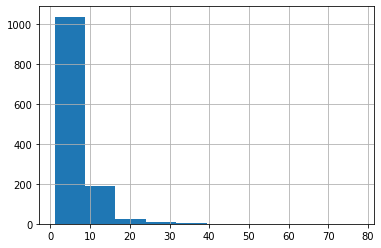

In [ ]:
df['wage'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82be7377f0>,
      dtype=object)

<Figure size 864x576 with 0 Axes>

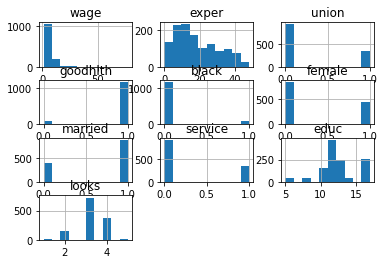

In [ ]:
plt.figure(figsize=(12,8))
df.hist()

In [ ]:
df['female'].nunique() # male and female

2

In [ ]:
df['female'].value_counts() 

0    824
1    436
Name: female, dtype: int64

In [ ]:
df['looks'].value_counts() # e.g 722 people have 3 ratings in looks

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [ ]:
df['looks'].unique()

array([4, 3, 2, 5, 1])

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [ ]:
#mean of healthy people
df['goodhlth'].mean()

0.9333333333333333

In [ ]:
df['goodhlth'].value_counts()

1    1176
0      84
Name: goodhlth, dtype: int64

In [ ]:
df['goodhlth'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

#Indexing

In [ ]:
# value of 1 row and 5th column
df.iloc[0,5]

1

In [ ]:
df.iloc[1,4]

0

In [ ]:
df.iloc[0, 0]

5.73

In [ ]:
df.iloc[:6, 5] # values of 5th column of first 6 rows 

0    1
1    1
2    1
3    0
4    0
5    1
Name: female, dtype: int64

In [ ]:
df.iloc[:6, 5:7] # values of 5th, 6th column of first 6 rows 

,female,married
0,1,1
1,1,1
2,1,0
3,0,1
4,0,1
5,1,1


#Creating dataframe

In [ ]:
toy_df = pd.DataFrame({'age': [17, 32, 45], 'salary': [56, 69, 120]}, index=['Kate', 'Leo', 'Max'])

In [ ]:
toy_df

,age,salary
Kate,17,56
Leo,32,69
Max,45,120


In [ ]:
toy_df.iloc[1,1]

69

# .loc

In [ ]:
toy_df.loc[['Leo', 'Max'], 'age']

Leo    32
Max    45
Name: age, dtype: int64

#Boolean Indexing

In [ ]:
# People with wage greate than 40  
df[df['wage'] > 40] 

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
602,77.72,9,1,1,1,1,1,1,13,4


In [ ]:
# Female with wage greate than 10  
df[ (df['wage'] > 10) & (df['female']==1) ] 

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3
602,77.72,9,1,1,1,1,1,1,13,4


# apply()

In [ ]:
# def gender_id_to_str(gender_id):
#     return 'female' if gender_id == 1 else 'male'

df['female'].apply(lambda gender_id: 'female' if gender_id == 1 else 'male' )

0       female
1       female
2       female
3         male
4         male
         ...  
1255    female
1256    female
1257    female
1258    female
1259    female
Name: female, Length: 1260, dtype: object

In [ ]:
df['female'].map({0: 'male', 1: 'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

# GroupBy

In [64]:
df.loc[df['female'] == 0, 'wage'].median()

6.41

In [65]:
df.loc[df['female'] == 1, 'wage'].median()

3.75

In [68]:
for (gender_id, sub_dataframe) in df.groupby('female'):
    print(gender_id)
    print(sub_dataframe.shape)
    print('Median wages for {} are {}'.format('men' if gender_id == 0 else 'women', sub_dataframe['wage'].median()))

0
(824, 10)
Median wages for men are 6.41
1
(436, 10)
Median wages for women are 3.75


In [69]:
 df.groupby('female')['wage'].median()

female
0    6.41
1    3.75
Name: wage, dtype: float64

In [70]:
df.groupby(['female', 'married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

 # crosstab

In [4]:
pd.crosstab(df['female'], df['married'])

married,0,1
female,,
0,166,658
1,223,213


In [5]:
import seaborn as sns

In [10]:
df['educ'].value_counts() # e.g. people who completed 12th are 468

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

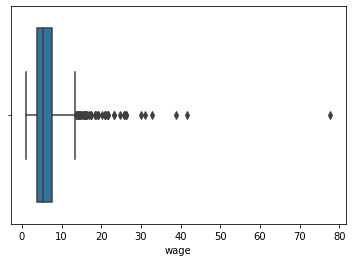

In [11]:
sns.boxplot(x='wage', data=df)

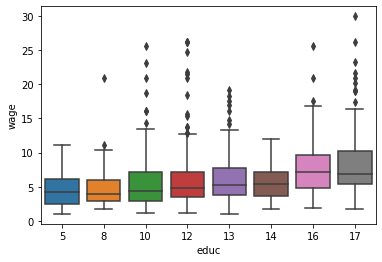

In [13]:
sns.boxplot(x='educ', y='wage', data=df[df['wage'] < 30])

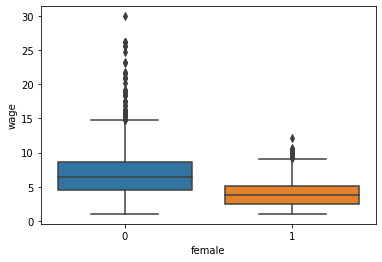

In [14]:
sns.boxplot(x='female', y='wage', data=df[df['wage'] < 30])

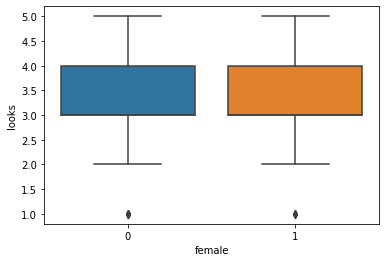

In [16]:
sns.boxplot(x='female', y='looks', data=df)

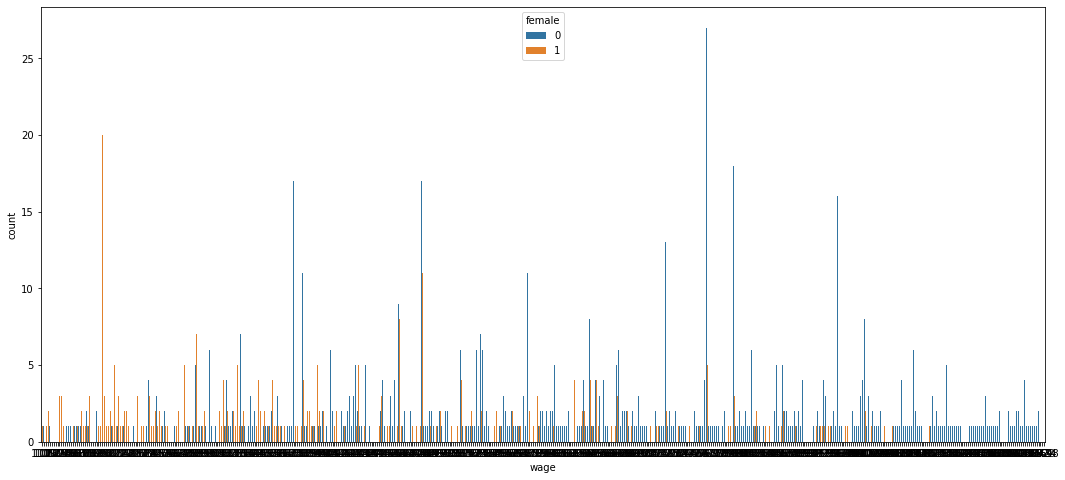

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(x='wage', hue='female', data=df[df['wage'] < 30])